### Note: J'ai réalisé se projet tout seul, j'ai pas réussis à avoir un binôme



## Import des bubliotheques

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns;sns.set()
liste_emotion = ["happy", "Fear", "suprise","anger","disgust","sadness"]

## Examen des données

### Chargement des données 

In [2]:
l = list(range(1,139))
colums = ['file']
n = len(l)//2
for i in range(1,n):
    x, y = "xy"
    colums.append(x+str(i))
    colums.append(y+str(i))
colums.append('x')

In [3]:
#lecture du fichier emotion
emotion = pd.read_csv('sujet\CK+\emotion.csv', delimiter =';')
emotion

,subject,file,emotion
0,S005,1,5
1,S010,1,2
2,S010,2,3
3,S010,3,6
4,S010,4,4
...,...,...,...
352,S138,1,2
353,S138,2,2
354,S138,4,3
355,S138,5,1


In [4]:
#recupère les dossier de chaque sujet present dans emotion
files  = emotion["subject"].unique()
files

array(['S005', 'S010', 'S011', 'S014', 'S022', 'S026', 'S028', 'S029',
       'S032', 'S034', 'S035', 'S037', 'S042', 'S044', 'S045', 'S046',
       'S050', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058',
       'S059', 'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066',
       'S067', 'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074',
       'S075', 'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082',
       'S083', 'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S091',
       'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099',
       'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107',
       'S108', 'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115',
       'S116', 'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S124',
       'S125', 'S127', 'S130', 'S131', 'S132', 'S133', 'S134', 'S135',
       'S136', 'S137', 'S138'], dtype=object)

In [5]:
#lecture de tous les fichiers present dans emotion de notre repertoire
data = pd.DataFrame()
path = "sujet\CK+"
for file in files:
    fichier = pd.read_csv(path +'\\' + file+ '\\' "omlands.csv" , sep =';', names = colums)
    fichier["subject"] = [file]*fichier.shape[0]
    data = pd.concat([data, fichier])

In [6]:
data.head()

,file,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x65,y65,x66,y66,x67,y67,x68,y68,x,subject
0,1,430,400,429,478,439,555,457,631,486,...,829,676,776,672,746,676,717,672,,S005
1,1,430,400,429,478,439,555,457,631,486,...,829,676,776,672,746,676,717,672,,S005
2,1,428,398,426,478,435,557,452,635,481,...,829,675,778,672,746,676,717,673,,S005
3,1,431,400,430,477,439,555,456,631,484,...,829,675,778,670,747,675,718,671,,S005
4,1,429,399,430,477,441,555,459,631,488,...,828,672,777,669,746,674,717,669,,S005


In [7]:
#reindexation et suppréssion de la colonne suplémentaire 
df = data.drop(columns = "x").reset_index(drop = True)
df

,file,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,y64,x65,y65,x66,y66,x67,y67,x68,y68,subject
0,1,430,400,429,478,439,555,457,631,486,...,669,829,676,776,672,746,676,717,672,S005
1,1,430,400,429,478,439,555,457,631,486,...,669,829,676,776,672,746,676,717,672,S005
2,1,428,398,426,478,435,557,452,635,481,...,668,829,675,778,672,746,676,717,673,S005
3,1,431,400,430,477,439,555,456,631,484,...,667,829,675,778,670,747,675,718,671,S005
4,1,429,399,430,477,441,555,459,631,488,...,665,828,672,777,669,746,674,717,669,S005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9575,8,396,408,399,470,407,530,419,589,439,...,602,702,607,644,601,620,603,597,600,S138
9576,8,397,413,400,473,408,531,420,588,442,...,601,705,605,644,599,621,601,597,598,S138
9577,8,397,411,399,473,407,533,421,591,443,...,600,708,603,647,598,622,600,597,598,S138
9578,8,398,409,400,469,407,527,419,585,441,...,600,708,602,646,598,621,599,597,597,S138


### Exploration des données

#### Analyse de forme

In [8]:
np.unique(df["subject"]).shape, np.unique(emotion["subject"]).shape

((99,), (99,))

Nous avons recupérer au total 99 sujets d'etudes  

In [9]:
df.shape , emotion.shape

((9580, 138), (357, 3))

In [10]:
# Selection des sections d'enregistrements et des sujets present sur emotion
df_emotion = emotion.merge(df, on=['file',"subject"], how ="left" )

In [11]:
df_emotion.shape

(6606, 139)

In [12]:
#suppresions des lignes dupliquées
df_emotion = df_emotion.drop_duplicates()

In [13]:
df_emotion.head()

,subject,file,emotion,x1,y1,x2,y2,x3,y3,x4,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,S005,1,5,430,400,429,478,439,555,457,...,778,669,829,676,776,672,746,676,717,672
2,S005,1,5,428,398,426,478,435,557,452,...,779,668,829,675,778,672,746,676,717,673
3,S005,1,5,431,400,430,477,439,555,456,...,779,667,829,675,778,670,747,675,718,671
4,S005,1,5,429,399,430,477,441,555,459,...,778,665,828,672,777,669,746,674,717,669
5,S005,1,5,431,393,431,469,439,544,457,...,779,662,830,670,778,667,746,671,716,667


In [14]:
df_emotion.shape

(6598, 139)

Après selection des sections d'enregistrements correspondant au emotion, il nous reste au total 6598 lignes, donc visage sur lesquels nos modèles seront entrainés

In [15]:
df_emotion.dtypes

subject    object
file        int64
emotion     int64
x1          int64
y1          int64
            ...  
y66         int64
x67         int64
y67         int64
x68         int64
y68         int64
Length: 139, dtype: object

In [16]:
#affichage d'un visage
def plot_visage(ligne):
    sns.scatterplot(x = ligne[3::2].values,y =  ligne[4::2].values).set_title(liste_emotion[ligne["emotion"]-1])

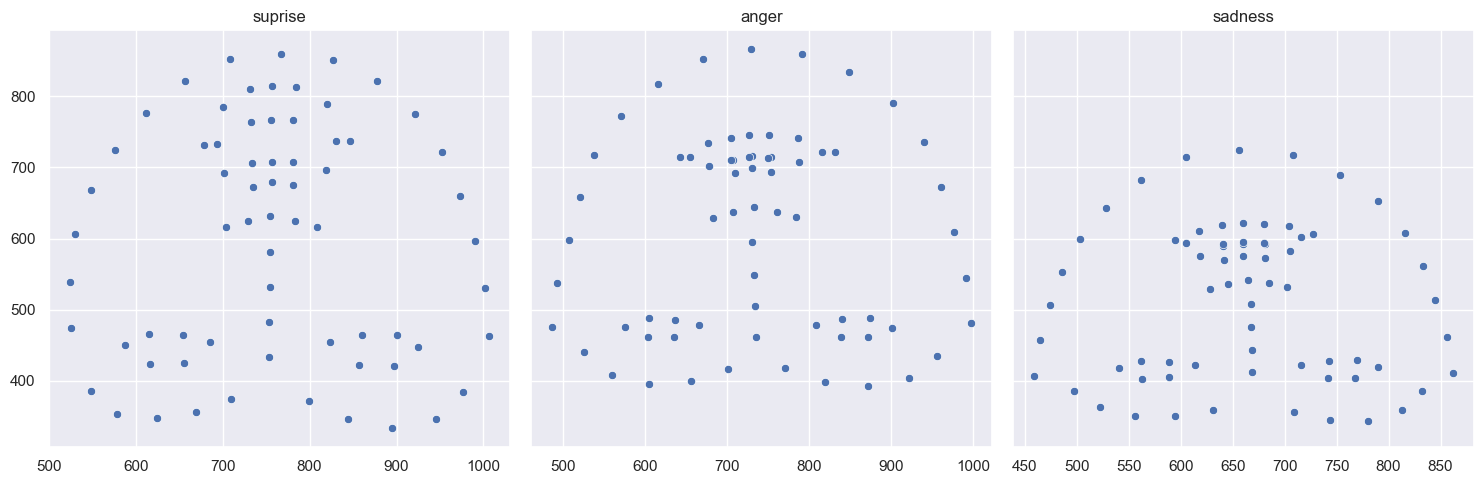

In [17]:
ligne = df_emotion.iloc[30]
ligne2 = df_emotion.iloc[260]
ligne3 = df_emotion.iloc[500]
listes_data = [ligne, ligne2, ligne3]
fig , axes = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
listes_axes= axes.flatten()
for i in range(len(listes_data)):
    sns.scatterplot(x = listes_data[i][3::2].values,
                    y =  listes_data[i][4::2].values, ax = listes_axes[i]).set_title(liste_emotion[listes_data[i]["emotion"]-1])
fig.tight_layout()

#### Analyse de fond

Dans cet analyse de fond de nos données, nous allons effectuer une études descriptives et statistiques sur nos données

In [18]:
y = df_emotion[["emotion"]]
x = df_emotion.drop(columns = ['subject', 'file', "emotion"])

In [19]:
#voir si il ya des valeurs nulls dans notre dataset
x.isna().sum()

x1     0
y1     0
x2     0
y2     0
x3     0
      ..
y66    0
x67    0
y67    0
x68    0
y68    0
Length: 136, dtype: int64

Pas de valeurs nulls dans notre dataset

In [20]:
x.describe()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,404.396332,413.427857,408.687481,471.514550,417.243407,528.966808,427.812064,586.408002,446.320400,641.108972,...,654.975902,609.921794,704.138982,618.365414,655.008791,625.168839,630.674295,628.397090,607.414974,625.098515
std,59.829461,46.620235,59.385780,45.708453,58.930400,45.409099,58.825472,45.756229,58.486443,46.784508,...,55.328897,49.359247,56.471860,49.876786,55.168752,53.551685,55.378624,53.937828,56.015419,53.522165
min,256.000000,290.000000,264.000000,355.000000,274.000000,411.000000,287.000000,465.000000,309.000000,518.000000,...,516.000000,468.000000,547.000000,476.000000,517.000000,476.000000,504.000000,477.000000,486.000000,476.000000
25%,365.000000,383.000000,370.000000,442.000000,378.000000,497.000000,388.000000,553.000000,407.000000,608.000000,...,619.000000,575.000000,667.250000,584.000000,619.000000,588.000000,595.000000,592.000000,571.000000,588.000000
50%,396.000000,412.000000,401.000000,471.000000,407.000000,528.000000,418.000000,584.000000,437.000000,637.000000,...,646.000000,607.000000,695.000000,614.000000,646.000000,618.000000,621.000000,622.000000,599.000000,618.000000
75%,437.000000,452.000000,439.000000,507.000000,445.000000,564.000000,455.000000,621.000000,475.000000,676.000000,...,684.000000,649.000000,733.000000,654.000000,685.000000,666.000000,660.000000,669.000000,638.000000,666.000000
max,637.000000,543.000000,640.000000,594.000000,645.000000,643.000000,657.000000,702.000000,674.000000,762.000000,...,846.000000,724.000000,906.000000,748.000000,846.000000,810.000000,820.000000,814.000000,800.000000,806.000000


In [21]:
# l'axe des abscisses
colonneX =   x[x.columns[pd.Series(x.columns).str.startswith('x')]]
colonneX.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68
0,430,429,439,457,486,537,601,670,748,823,...,716,682,665,718,747,778,829,776,746,717
2,428,426,435,452,481,534,600,671,748,824,...,715,680,662,718,748,779,829,778,746,717
3,431,430,439,456,484,536,600,670,747,823,...,717,683,666,719,748,779,829,778,747,718
4,429,430,441,459,488,539,604,672,746,821,...,716,682,665,717,747,778,828,777,746,717
5,431,431,439,457,484,534,598,665,741,819,...,714,680,664,716,746,779,830,778,746,716


In [22]:
# l'axe des ordonnées
colonneY = x[x.columns[pd.Series(x.columns).str.startswith('y')]]
colonneY.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y59,y60,y61,y62,y63,y64,y65,y66,y67,y68
0,400,478,555,631,701,764,812,852,864,849,...,717,704,675,669,673,669,676,672,676,672
2,398,478,557,635,706,768,814,852,863,847,...,716,704,675,668,672,668,675,672,676,673
3,400,477,555,631,702,764,810,850,861,847,...,715,702,673,667,671,667,675,670,675,671
4,399,477,555,631,702,764,811,850,862,848,...,714,701,671,666,670,665,672,669,674,669
5,393,469,544,621,693,755,803,845,860,846,...,711,698,667,662,666,662,670,667,671,667


<AxesSubplot: >

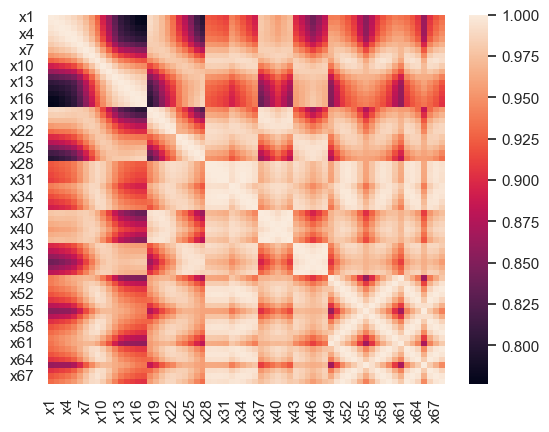

In [23]:
#matrice de correlation des données
corrX = colonneX.corr(method= "pearson")
corrX.head()
sns.heatmap(data= corrX)

<AxesSubplot: >

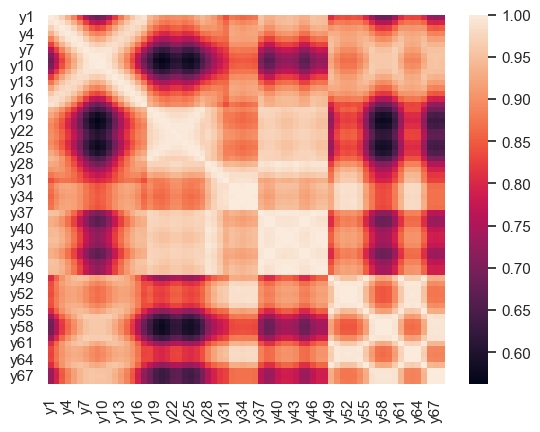

In [24]:
corrY = colonneY.corr(method= "pearson")
corrY.head()
sns.heatmap(data= corrY)

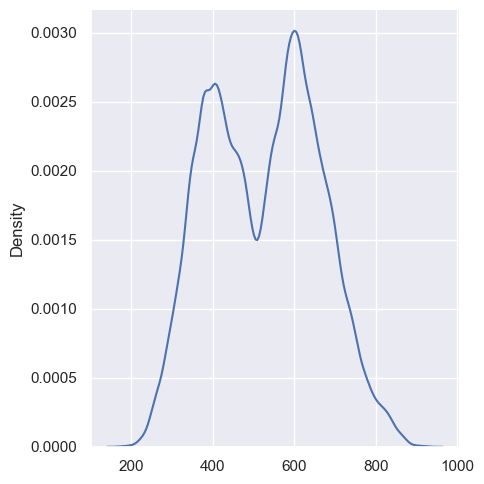

In [25]:
sns.displot(data = np.ravel(colonneY.to_numpy()),  kind = "kde")

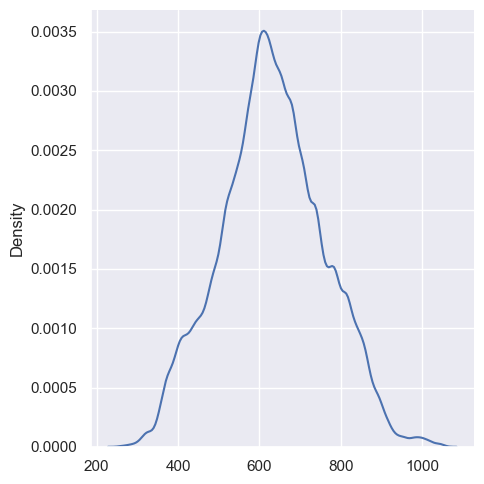

In [26]:
sns.displot(data = np.ravel(colonneX.to_numpy()), kind = "kde")

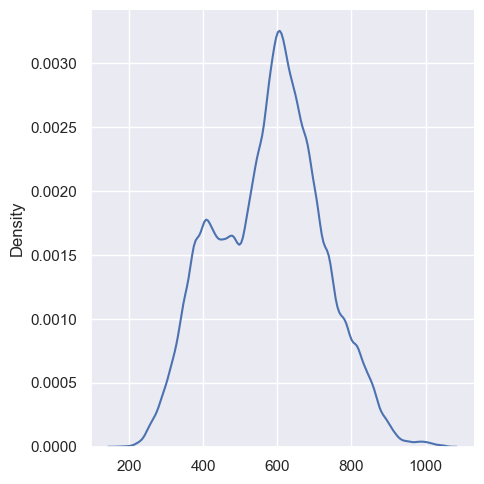

In [27]:
sns.displot(data = np.ravel(x.to_numpy()), kind = "kde")

#### Remarque
Nous remerquons que le distribution des points faciaux suivent une distribution normale centrée entre [400, 800]. Donc les données se concentrent plus vers le nez ,les yeux et la bouche de la personne

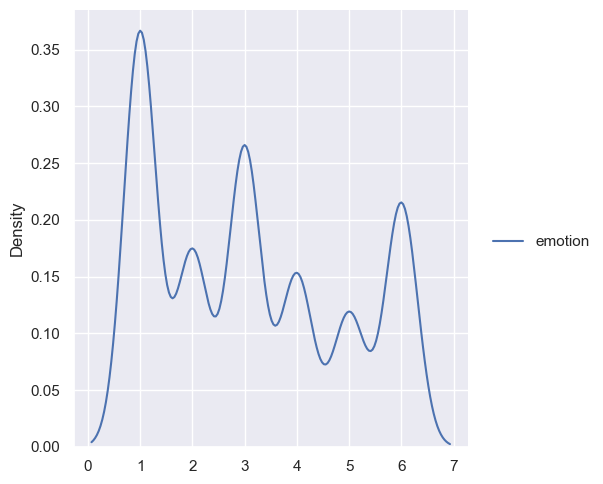

In [28]:
sns.displot(y, kind="kde")

#### Remarque
Cette distribution nous montre que les emotions present dans notre dataset ne sont pas très egalitaire en terme de representation.</br>
Il ya plus de données pour l'émotion "happy" que celle de "disgust" par exemple.</br>
Cela risque d'etre un biais lors de l'entrainement de nos differents models, nous allons etudier cela dans la partie Modélisation

### Pre-processing des donées

Dans cette partie nous allons ecrires toutes les fonctions de transformations des donées dont nous avons besion</br>


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaled = StandardScaler()

In [30]:
Xscaled = scaled.fit_transform(x.iloc[:, x.columns!= "emotion"])
df_Scaled = pd.DataFrame(data = Xscaled, columns=x.columns[x.columns!= "emotion"])

In [31]:
df_Scaled

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,0.427977,-0.288048,0.342069,0.141898,0.369219,0.573347,0.496216,0.974630,0.678492,1.280244,...,2.223674,1.196993,2.211198,1.155627,2.193277,0.874570,2.082653,0.882618,1.956485,0.876367
1,0.394546,-0.330951,0.291548,0.141898,0.301337,0.617394,0.411212,1.062056,0.592996,1.387125,...,2.241749,1.176732,2.211198,1.135576,2.229533,0.874570,2.082653,0.882618,1.956485,0.895052
2,0.444692,-0.288048,0.358910,0.120019,0.369219,0.573347,0.479215,0.974630,0.644294,1.301620,...,2.241749,1.156471,2.211198,1.135576,2.229533,0.837220,2.100712,0.864077,1.974339,0.857681
3,0.411261,-0.309500,0.358910,0.120019,0.403160,0.573347,0.530218,0.974630,0.712691,1.301620,...,2.223674,1.115949,2.193489,1.075423,2.211405,0.818545,2.082653,0.845536,1.956485,0.820311
4,0.444692,-0.438209,0.375750,-0.055017,0.369219,0.331086,0.496216,0.756064,0.644294,1.109234,...,2.241749,1.055165,2.228908,1.035321,2.229533,0.781195,2.082653,0.789912,1.938632,0.782940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,-0.090202,-0.180791,-0.112619,-0.186294,-0.122924,-0.219506,-0.115810,-0.205627,-0.090975,-0.237468,...,-0.126090,-0.464422,0.192341,-0.749211,-0.127052,-0.731477,-0.174707,-0.711931,-0.221652,-0.711881
6594,-0.106918,-0.180791,-0.129460,-0.230053,-0.156865,-0.241530,-0.149811,-0.249340,-0.142273,-0.301596,...,-0.126090,-0.464422,0.139213,-0.769262,-0.145180,-0.750152,-0.174707,-0.730472,-0.221652,-0.730566
6595,-0.123633,-0.245145,-0.179981,-0.273811,-0.207776,-0.307601,-0.200814,-0.336767,-0.193571,-0.365725,...,-0.108015,-0.484683,0.174632,-0.789313,-0.127052,-0.750152,-0.192766,-0.730472,-0.257359,-0.749251
6596,-0.106918,-0.223694,-0.146300,-0.251932,-0.173835,-0.285577,-0.183813,-0.293053,-0.176471,-0.301596,...,-0.089940,-0.484683,0.263178,-0.829415,-0.090797,-0.768827,-0.192766,-0.749013,-0.275212,-0.749251


In [32]:
def take_data():
    """
    fonction qui retourne ma cible et mes features
    """
    y = df_emotion[["emotion"]]
    x = df_emotion.drop(columns = ['subject', 'file', "emotion"])
    return x , y

In [33]:
def makecolumns(min_index, max_index):
    """
    fonction qui retourne les colonnes 
    
    """
    c =[]
    for i in range(min_index,max_index+1):
        x, y = "xy"
        c.append(x+str(i))
        c.append(y+str(i))
    return np.array(c)

#### Visage aligné
Comme indiquer dans le sujet, certains visages sont pas allignés, et cela pourrais causer une erreur de predictions, pour cela nous allons faire un allignement des visages en fonction du nez le points (x34,y34)

In [34]:
def trans(ligne):
    """
    cette fonction a pour but d'aligné le visage de la persone
    Le repère est le nez de la persone le point x34 et y34
    """
    ligne[0::2] = ligne[0::2].values - ligne[0::2].values[33]
    ligne[1::2] = ligne[1::2].values - ligne[1::2].values[33]

In [35]:
def tranforme_data_alined_face(data):
    data.apply(lambda ligne: trans(ligne), axis = 1)
    

[Text(0.5, 1.0, 'Aligned Face  ')]

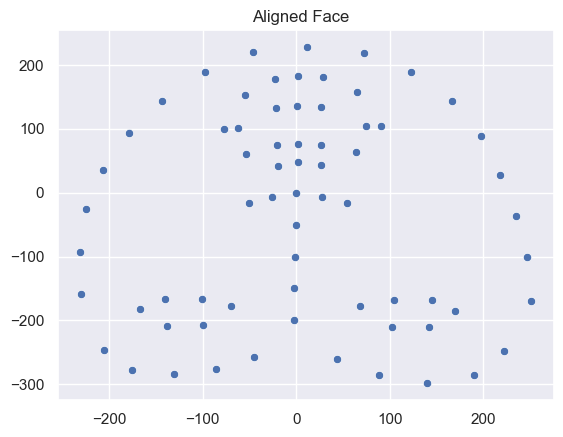

In [36]:
x , y =  take_data()
x1 , y1 =  take_data()
tranforme_data_alined_face(x)
l = x.iloc[30]
l2 = x1.iloc[30]
sns.scatterplot(x = l[0::2].values,y =  l[1::2].values).set(title = "Aligned Face  ")

[Text(0.5, 1.0, 'Not Aligned Face  ')]

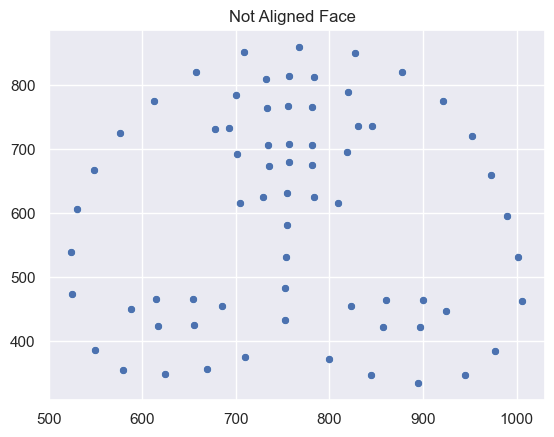

In [37]:
sns.scatterplot(x = l2[0::2].values,y =  l2[1::2].values).set(title = "Not Aligned Face  ")

####  Gestion du déséquilibre de la cible
Les données que nous avons notre disposition sont pas très desequilibrées sur certaines expressions</br>
Pour regler ce problème nous pouvons commencer par reperer la cible la moins representer et ensuite, reduire les autres cible a la même taille qu'elle.</br>
Comme on se doute, nous allons perdre beaucoup données et cella pourrais fortement influancer la precison de nos modèles</br>
Dans le figure de distribution des données, nous avons constater que la cible la moins representer est celle qui correspond à l'émotion 5 </br>
Nous allons donc reduire toutes les autres cibles a son niveau

In [38]:
def reduce_data(data):
    """
    cette fonction permet de mettre au même niveau toutes les cibles
    param: @data(les données a reduire) 
    """
    # on regroupe le dataset en fonction des emotions et ensuite on recupère le shape de chaque composant 
    shapes = data.groupby("emotion").apply(func = np.shape)
    # on enregistre le minimum 
    max_row = min(shapes)[0]
    # le resultat de chaque decoupage
    result = []
    # ensemble des targets
    targets = np.unique(data["emotion"] )
    for t in targets:
        #on a joute dans result chaque decoupage
        result.append(data[data["emotion"]==t].iloc[:max_row:,])
    # on retourne le resultat concatener    
    return pd.concat(result)

In [39]:
x, y = take_data()
x["emotion"] = y
data = reduce_data(x)
data.head(5)

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y64,x65,y65,x66,y66,x67,y67,x68,y68,emotion
93,524,468,524,528,528,587,537,645,556,701,...,695,832,695,776,696,750,700,728,696,1
94,522,467,523,528,528,586,538,644,555,700,...,695,834,695,776,698,750,701,728,697,1
95,524,468,524,530,528,588,537,645,556,700,...,695,836,695,776,697,750,700,727,697,1
96,524,467,524,527,527,585,535,642,552,697,...,694,836,694,778,699,750,703,725,699,1
97,521,468,521,528,525,586,535,643,552,699,...,688,841,692,782,707,752,710,725,706,1


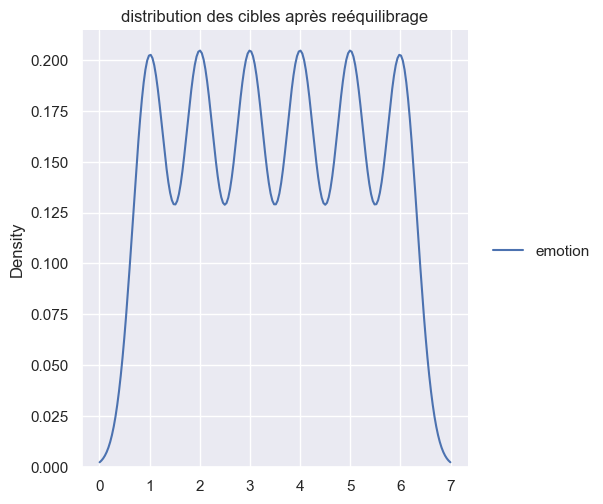

In [40]:
y = data[["emotion"]]
sns.displot(y, kind="kde").set( title = "distribution des cibles après reéquilibrage")

#### Les occultations et bruitages
Les occultations c'est un manque de données sur certains parties du visage, comme le nez, les yeux et bien d'autre</br>
Le bruitage quand t'a lui est le fait de modifier certaines parties du visage, en y ajoutant des inperfections

In [41]:
def occultation(data, min_point, max_point):
    """
    cette fonctionne fait une occultation d'une partie du visage
    
    params: @data (les données), @min_point (le min de la partie du visage qu'on veut occulter)
            @max_point (le max de la partie du visage qu'on veut occulter)
            
    exemple: si on veut faire une occultation sur l'oeil gauche qui correspont au points (37 à 42) d'un visage, 
                dans ce cas min_point est 37 et max_point est 42
    """
    #ce code qui suit genère les colonnes qui correspond a la partie qu'on veut occulter
    colums = makecolumns(min_point,max_point)
        
    # ensuite on supprime ces colonnes
    data[colums]= data[colums]*0

In [42]:
def bruit(ligne):
    """
    cette fonction applique un bruit sur une partie du visage

    """
    bruit  = np.random.randn(1000).sum()
    ligne[0::2] = ligne[0::2].values - int(bruit)
    ligne[1::2] = ligne[1::2].values - int(bruit)

In [43]:
def bruitage(data, min_point, max_point):
    """
    cette fonctionne applique un bruit sur une partie du visage
    
    params: @data (les données), @min_point (le min de la partie du visage qu'on veut bruiter)
            @max_point (le max de la partie du visage qu'on veut bruiter)
            
    exemple: si on veut ajouter du bruit sur l'oeil gauche qui correspont au points (37 à 42) d'un visage, 
                dans ce cas min_point est 37 et max_point est 42
    """
    #ce code qui suit genère les colonnes qui correspond a la partie qu'on veut occulter
    colums = makecolumns(min_point,max_point)
    
    #on applique le bruit sur chaque ligne correspondant
    d = data[colums]
    d.apply(lambda ligne: bruit(ligne))
    data[colums] = d


[Text(0.5, 1.0, 'sans bruit')]

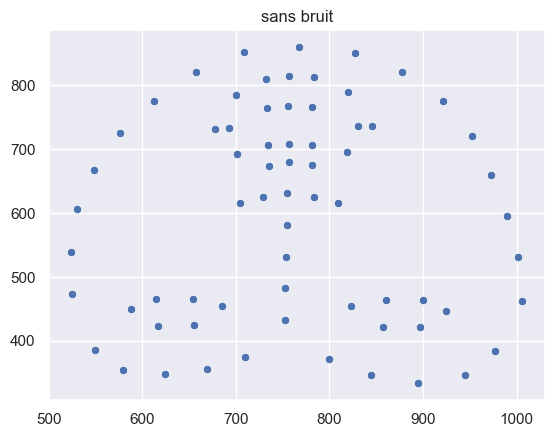

In [44]:
x , y =  take_data()
x1, y1 = take_data()
l = x1.iloc[30]
sns.scatterplot(x = l[0::2].values,y =  l[1::2].values).set(title = "sans bruit")

[Text(0.5, 1.0, "bruitage de l'oeil gauche")]

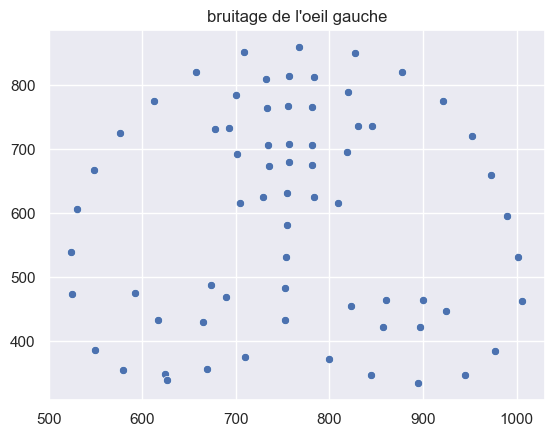

In [45]:
bruitage(x, 37, 42)
l = x.iloc[30]
sns.scatterplot(x = l[0::2].values,y =  l[1::2].values).set(title = "bruitage de l'oeil gauche")

[Text(0.5, 1.0, "Occultations de l'oval du visage")]

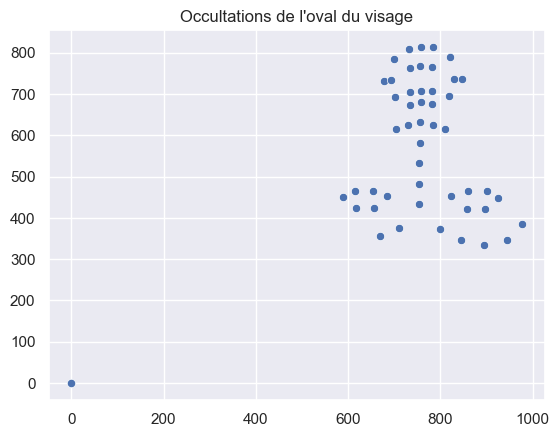

In [46]:
x , y =  take_data()
occultation(x, 1, 20)
l = x.iloc[30]
sns.scatterplot(x = l[0::2].values,y =  l[1::2].values).set(title = "Occultations de l'oval du visage")

[Text(0.5, 1.0, "occultation l'oeil gauche")]

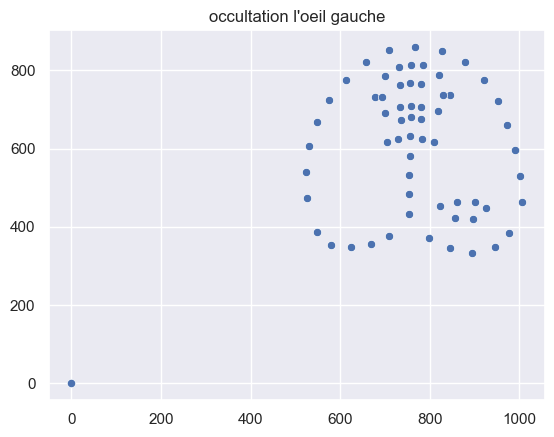

In [47]:
x , y =  take_data()
occultation(x, 37, 42)
l = x.iloc[30]
sns.scatterplot(x = l[0::2].values,y =  l[1::2].values).set(title = "occultation l'oeil gauche")

#### Image neutre et apex
Les données que nous avons a notre disposition, sont des données des expressions faciales, mais chaque expression vas de neutre à expressive, l'idée est au lieu de consider toutes expression on pourrais juste prendre la difference entre expression neutre et expressive

In [48]:
x,y = take_data()

In [49]:
def sous(data):
    x = data.drop(columns = ['subject', 'file', "emotion"])
    d = x.iloc[0].values-x.iloc[-1].values
    data = pd.DataFrame(data = d.reshape(1,-1), columns =makecolumns(1,68) )
    return data

In [50]:
def make_neutre_to_apex(groupes):
    """
    """
    vg= []
    for x, y in groupes:
        y = sous(y)
        y["emotion"] = x[0]
        vg.append(y)
    return pd.concat(vg).reset_index(drop = True)

In [51]:
groupes = df_emotion.groupby(["emotion", "file", "subject"])
data = make_neutre_to_apex(groupes)

In [52]:
data.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y64,x65,y65,x66,y66,x67,y67,x68,y68,emotion
0,3,1,5,1,8,1,9,0,5,4,...,12,-23,22,-5,-6,-2,-7,0,-6,1
1,1,8,2,9,3,9,3,8,6,6,...,4,-11,13,0,4,0,3,1,4,1
2,0,-4,1,-3,3,-2,5,-4,2,-2,...,4,-13,12,0,2,4,2,7,3,1
3,3,11,4,12,3,10,5,7,3,4,...,18,-22,20,-13,-30,-3,-32,5,-31,1
4,1,-7,0,-9,1,-10,0,-11,-4,-10,...,14,-44,20,-24,-33,-13,-35,-3,-35,1


## Modélisation

Dans la modélisation, nous allons nous baser sur trois approches differentes:</br>
- Prémièrement nous allons comparer des different modèles de classifications en fonction d'une metrique qui sera choisi</br>

- Deuxièment, nous allons comparer les modèles en utilsant une Kfold cross validation sur les donées pour chaque modèles</br>
- Troisièment, nous allons mettre en oeuvre les differentes estimateurs qui representent nos modèles sur une methode d'ensemble et les comparer:</br>
    - Bagging (Plusieurs antités d'un même modèl et entrainer chaque copie sur une portion aleatoire du dataset)</br>
    - Boosting (Entrainer plusieurs modèls differents, l'un après l'autre en essayant de corriger les erreurs des précedents )</br>
    - Stacking (Cette techinque se repose sur le fait d'apprendre d'un modèle final, à corriger les erreurs des autres )


Et Puis pour finir on choisi la meilleure manière, c'est a dire celle qui optimise le mieux notre score general, puis le meilleur modèle de cette manière

In [53]:
#importation de tous les modèles
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
models = [MLPClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), 
          KNeighborsClassifier(),GaussianNB(),SVC(), SGDClassifier()]
modelnames = ['MLP', 'ArbreDe', 'RF', 'KN', 'NB', 'SV', "SGD"]

Nous allons comparer nos modèles en fonction du f1 score de chacun d'entre eux et aussi en fonction du rapport entre leur temps d'entrainement et le f1 score</br>
La dessicion de prendre le f1 score comme metric de comparaison est que cette mesure nous permet de savoir la vrai performance d'un modèle, car ce dernier fais une moyenne de la metric precison (qui penalise les faux positifs) et du recall (qui penalise les faux negatifs).</br>

Dans cette étude nous allons utiliser le bagging comme methode d'ensemble, car elle permet de comparer précisement les models entre eux.</br>

Et nous allons consider le RandomForestClassifier comme un modèle et pas une methode d'ensemble.</br>

Le choix du Kfold est dû au fait qu'avec le Kfold nous etudions nos medèles sur un même dataset pour eviter un quelquonque biais, et la cross validation nous permet de voir la precision de nos modèles sur des petites tailles de données




In [54]:
import timeit
def initialise(diction, models):
    """
    inialise un dictionaire avec le nom des modèls
    """
    for m in models:
        diction[m.__class__.__name__]= []

In [55]:
def compare_models_f1_score(models, x , y):
    """
    ce fonction fait une comparaison de tous les models en paramètre sur la base de score F1
    params: @models, @x,@y
    return:@best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #re = np.array([])
    #decoupage des données en donées d'entrainement et de tests
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    for model in models:
        #entrainer chaque modèle
        model.fit(X_train, np.ravel(y_train))
        #faire une predictio générale
        ypred = model.predict(X_test)
        #calcule du f1 score
        score = f1_score( np.ravel(y_test),ypred, average='weighted')
        #ajout du resultat dans mon dictionaire 
        result[model.__class__.__name__].append(score)
        #re.append(score)
        if scorem<score:
            scorem = score
            #recuper le meilleur model
            best = model
        print("{}:{}".format(model.__class__.__name__,score))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score

In [56]:
def compare_models_f1_score_et_temps(models, x , y):
    """
    ce fonction fait une comparaison de tous les models en paramètre sur la base de score F1 et du temps d'entrainemnt
    params: @models, @x,@y
    return:@best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #decoupage des données en donées d'entrainement et de tests
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    for model in models:
        #entrainer chaque modèle
        r = %timeit -o -q -r1 -n1 model.fit(X_train, np.ravel(y_train))
        time = r.timings[0]
        #faire une predictio générale
        ypred = model.predict(X_test)
        #calcule du f1 score
        score = f1_score(np.ravel(y_test),ypred, average='weighted')
        #on fait un rapport entre le score et le temps pour recuperer le meilleur en fonction du score et du temps de fit
        metric=score/time
       
        #ajout du resultat dans mon dictionaire 
        result[model.__class__.__name__].append(metric)
        if scorem<metric:
            scorem = metric
            #recuper le meilleur model
            best = model
        print("{}:{},{},{}".format(model.__class__.__name__,score, metric, time))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score

In [57]:
def compare_models_validation_croise_et_temps(models, x , y, cv=5):
    """
    ce fonction fait une validation croisée et compare tous les models en paramètre sur la base de score F1
    params: @models (les differents modèls), @x(données) , @y(cible), @cv(nombre de validations croisées)
    return: @best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #validation croisée
    kfol = KFold(n_splits=cv)
    for model in models:
        scores= []
        temps = 0
        for train_index, test_index in kfol.split(x):
            #apprentissage et prediction du modèle
            r = %timeit -o -q -r1 -n1 model.fit(x.iloc[train_index],np.ravel(y.iloc[train_index]))
            ypred = model.predict(x.iloc[test_index])
            temps = temps+ r.timings[0]
            #calcule du f1 score et ajout dans ma liste des scores
            scores.append(f1_score(np.ravel(y.iloc[test_index]),ypred, average='weighted'))
        #ajout du resultat dans mon dictionaire
        score = np.mean(scores)/temps
        result[model.__class__.__name__].append(score)
        if scorem<score:
                scorem = score
                #recuper le meilleur model
                best = model
        print("{}:{}".format(model.__class__.__name__,score))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score


In [58]:
def compare_models_validation_croise(models, x , y, cv=5):
    """
    ce fonction fait une validation croisée et compare tous les models en paramètre sur la base de score F1 et du temps de fit
    params: @models (les differents modèls), @x(données) , @y(cible), @cv(nombre de validations croisées)
    return: @best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #validation croisée
    kfol = KFold(n_splits=cv)
    for model in models:
        scores= []
        for train_index, test_index in kfol.split(x):
            #apprentissage et prediction du modèle
            model.fit(x.iloc[train_index],np.ravel(y.iloc[train_index]))
            ypred = model.predict(x.iloc[test_index])
            
            #calcule du f1 score et ajout dans ma liste des scores
            scores.append(f1_score(np.ravel(y.iloc[test_index]),ypred, average='weighted'))
        #ajout du resultat dans mon dictionaire
        score = np.mean(scores)
        result[model.__class__.__name__].append(score)
        if scorem<score:
                scorem = score
                #recuper le meilleur model
                best = model
        print("{}:{}".format(model.__class__.__name__,score))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score


In [59]:
def compare_methode_ensemble(models, ensemble, x , y):
    """
    cette fonction fait une comparaison de tous les models en paramètre sur la base de score F1
    params: @models, @x,@y, @ensemble (méthode d'ensemble)
    return:@best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #decoupage des données en donées d'entrainement et de tests
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    for model in models:
        #entrainer chaque modèle
        ensemble = ensemble.set_params(base_estimator=model)
        ensemble.fit(X_train, np.ravel(y_train))
        ypred = ensemble.predict(X_test)
        #calcule du score
        score = f1_score(np.ravel(y_test),ypred, average='weighted')
        #ajout du resultat dans mon dictionaire 
        result[model.__class__.__name__].append(score)
        if scorem<score:
            scorem = score
            #recuper le meilleur model
            best = model
        print("{}:{}".format(model.__class__.__name__,score))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score


In [60]:
def compare_methode_ensemble_et_temps(models, ensemble, x , y):
    """
    cette fonction fait une comparaison de tous les models en paramètre sur la base de score F1
    params: @models, @x,@y, @ensemble (méthode d'ensemble)
    return:@best (meilleur modèles) et @data_score(un dataframe des l'ensemble des scores)
    """
    scorem = 0
    result= dict()
    #initialisation du dictionnaire
    initialise(result, models)
    #decoupage des données en donées d'entrainement et de tests
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    for model in models:
        #entrainer chaque modèle
        ensemble = ensemble.set_params(base_estimator=model)
        r = %timeit -o -q -r1 -n1 ensemble.fit(X_train, np.ravel(y_train))
        ypred = ensemble.predict(X_test)
        #calcule du score
        s = f1_score(np.ravel(y_test),ypred, average='weighted')
        #ajout du resultat dans mon dictionaire 
        score = s/r.timings[0]
        result[model.__class__.__name__].append(score)
        if scorem<score:
            scorem = score
            #recuper le meilleur model
            best = model
        print("{}:{}:{},{}:{},{}:{}".format(model.__class__.__name__,"metric ",score, "temps ",r.timings[0],"score ",s ))
    print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
    #recuperer un dataframe de l'ensemble de mes scores pour les visualiser
    data_score = pd.DataFrame(data = result)
    data_score.columns = modelnames
    return best, data_score


In [61]:
def plotting(listes_data, titles, fig_title):
    fig , axes = plt.subplots(1, 3, figsize=(15, 5), sharey = True)
    fig.suptitle(fig_title, fontsize=30)
    listes_axes= axes.flatten()
    for i in range(len(listes_data)):
        sns.barplot(data = listes_data[i] , ax =listes_axes[i], orient='v' ).set(title = titles[i])
    fig.tight_layout()

### Premières approches
#### Considerer les coordonées des points

In [62]:
#on recupère les données
x, y= take_data()

In [63]:
best, data_f1_score = compare_models_f1_score(models, x , y)

MLPClassifier:0.30788405562294646
DecisionTreeClassifier:0.8847005765174472
RandomForestClassifier:0.9903564512985674
KNeighborsClassifier:0.9439902854606941
GaussianNB:0.2070089720656925
SVC:0.47805984054163714
SGDClassifier:0.4871406905410556
the best is RandomForestClassifier:0.9903564512985674


In [64]:
best, data_f1_score_temps =compare_models_f1_score_et_temps(models, x , y)

MLPClassifier:0.15514910693757936,0.07515267582246708,2.064452200000005
DecisionTreeClassifier:0.8988556978106633,1.1132729606502663,0.8073992000000061
RandomForestClassifier:0.9889698269342563,0.18527129339499068,5.337954999999994
KNeighborsClassifier:0.935029755168833,99.35498407914433,0.009411000000000058
GaussianNB:0.23975436398441483,7.7284024170998045,0.031022499999991737
SVC:0.47435364664641766,0.08479345309238777,5.5942249
SGDClassifier:0.40514683606264373,0.28939793549239345,1.39996450000001
the best is KNeighborsClassifier:99.35498407914433


In [65]:
best, data_cros_val = compare_models_validation_croise(models, x , y, cv=5)

MLPClassifier:0.2032135276855762
DecisionTreeClassifier:0.33109470378102135
RandomForestClassifier:0.35239816294948584
KNeighborsClassifier:0.297260728255458
GaussianNB:0.21063352177054256
SVC:0.41559224189604216
SGDClassifier:0.42942808335629046
the best is SGDClassifier:0.42942808335629046


In [66]:
best, data_cros_val_temps = compare_models_validation_croise_et_temps(models, x , y, cv=5)

MLPClassifier:0.011500418020011402
DecisionTreeClassifier:0.08045934367179315
RandomForestClassifier:0.013271081151297067
KNeighborsClassifier:3.9916681986689784
GaussianNB:1.1684633976935135
SVC:0.011782718762619807
SGDClassifier:0.040909091752157754
the best is KNeighborsClassifier:3.9916681986689784


In [67]:
best, data_baggin = compare_methode_ensemble(models, BaggingClassifier(), x , y)

MLPClassifier:0.32165445061503944
DecisionTreeClassifier:0.9564243426470893
RandomForestClassifier:0.9862045537423876
KNeighborsClassifier:0.9341126622866089
GaussianNB:0.2030424179568465
SVC:0.4531826205727983
SGDClassifier:0.4973721066332577
the best is RandomForestClassifier:0.9862045537423876


In [68]:
best, data_baggin_temps = compare_methode_ensemble_et_temps(models,BaggingClassifier(), x , y )

MLPClassifier:metric :0.010086831769518176,temps :31.35736330000003,score :0.3162964483427636
DecisionTreeClassifier:metric :0.17534683163451056,temps :5.404450399999973,score :0.9476532543658586
RandomForestClassifier:metric :0.027074303709678525,temps :36.2568225,score :0.9816282239129057
KNeighborsClassifier:metric :4.323127109529612,temps :0.21825310000008358,score :0.9435358933492388
GaussianNB:metric :0.45482276812682554,temps :0.42684600000006867,score :0.1941392792838942
SVC:metric :0.022043573767661296,temps :21.199641100000008,score :0.46731585243579443
SGDClassifier:metric :0.048353714508271306,temps :10.1643732,score :0.491485199868324
the best is KNeighborsClassifier:4.323127109529612


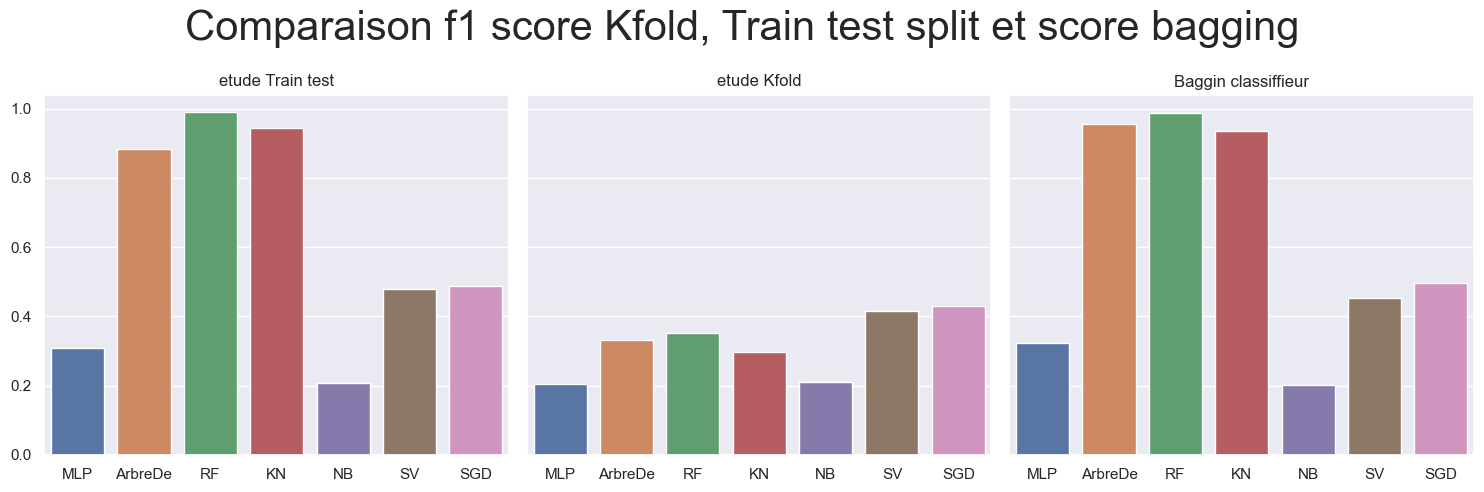

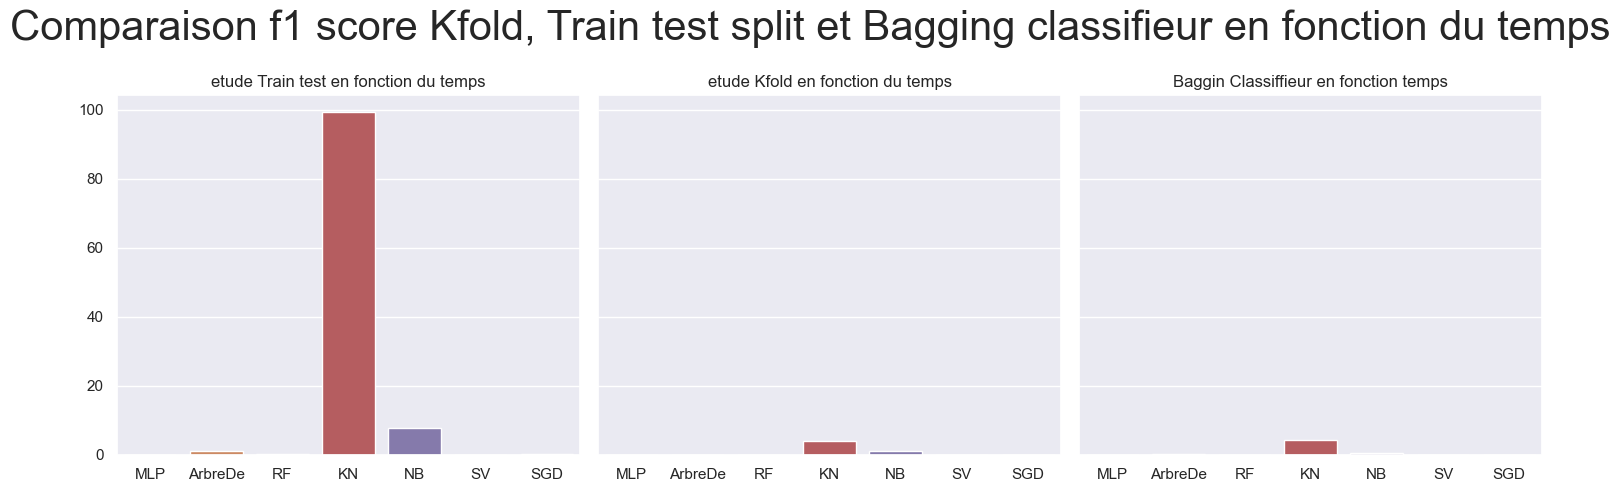

In [69]:
listes_data = [data_f1_score, data_cros_val, data_baggin ]
titles = ["etude Train test","etude Kfold", "Baggin classiffieur" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et score bagging")
listes_data = [data_f1_score_temps, data_cros_val_temps, data_baggin_temps  ]
titles = ["etude Train test en fonction du temps","etude Kfold en fonction du temps", 
          "Baggin Classiffieur en fonction temps" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et Bagging classifieur en fonction du temps")

#### Analyse du Résultat 

Cette étude nous montre qu'en terme de score le RandomForestClassifier nous donne le meilleur score dans tous les cas.</br>
Mais surtout nous voyons que les modèls sont pas efficace sur les petites tailles de données, le meilleur atteint a peine les 50% de precission

Mais par contre si nous prenons le temps d'entrainement en compte le KNeighborsClassifier est de loin le meilleur, il donne le deuxième meilleur socre et avec temps le plus minim possible.Tout seul seul il encore plus efficase

#### Considerer les coordonées des points avec visages alignés

In [70]:
#on recupère les données
x, y= take_data()
# on aligne les visages
tranforme_data_alined_face(x)
x.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,-318,-202,-319,-124,-309,-47,-291,29,-262,99,...,30,67,81,74,28,70,-2,74,-31,70
2,-321,-203,-323,-123,-314,-44,-297,34,-268,105,...,30,67,80,74,29,71,-3,75,-32,72
3,-319,-200,-320,-123,-311,-45,-294,31,-266,102,...,29,67,79,75,28,70,-3,75,-32,71
4,-320,-200,-319,-122,-308,-44,-290,32,-261,103,...,29,66,79,73,28,70,-3,75,-32,70
5,-319,-204,-319,-128,-311,-53,-293,24,-266,96,...,29,65,80,73,28,70,-4,74,-34,70


In [71]:
best, data_f1_score = compare_models_f1_score(models, x , y)

MLPClassifier:0.710374021587921
DecisionTreeClassifier:0.8323928498258
RandomForestClassifier:0.9571858649813294
KNeighborsClassifier:0.8986101757020146
GaussianNB:0.49319619333610987
SVC:0.4906946065209804
SGDClassifier:0.6511093540069126
the best is RandomForestClassifier:0.9571858649813294


In [72]:
best, data_f1_score_temps =compare_models_f1_score_et_temps(models, x , y)

MLPClassifier:0.6210117287755283,0.19717408478361514,3.1495605999999725
DecisionTreeClassifier:0.810730615108465,1.1159424327981498,0.7264986000000135
RandomForestClassifier:0.9583541559703476,0.22387169388490424,4.28081880000002
KNeighborsClassifier:0.9093760921041936,103.54528285058906,0.008782399999972768
GaussianNB:0.48863761221307117,14.848235493651364,0.03290879999997287
SVC:0.5177054833559954,0.09066871265259528,5.7098581000000195
SGDClassifier:0.6681784677798255,0.540173455900425,1.2369701999999734
the best is KNeighborsClassifier:103.54528285058906


In [73]:
best, data_cros_val = compare_models_validation_croise(models, x , y, cv=5)

MLPClassifier:0.5776968033345956
DecisionTreeClassifier:0.4600970135204247
RandomForestClassifier:0.5115787560527961
KNeighborsClassifier:0.4272095779279418
GaussianNB:0.44287946923585386
SVC:0.4574819108489955
SGDClassifier:0.5864895790935467
the best is SGDClassifier:0.5864895790935467


In [74]:
best, data_cros_val_temps = compare_models_validation_croise_et_temps(models, x , y, cv=5)

MLPClassifier:0.0190907114843127
DecisionTreeClassifier:0.11096083024951449
RandomForestClassifier:0.020762036350171483
KNeighborsClassifier:5.310025156523987
GaussianNB:2.177960074138813
SVC:0.01317462168287836
SGDClassifier:0.07222563265617678
the best is KNeighborsClassifier:5.310025156523987


In [75]:
best, data_baggin = compare_methode_ensemble(models, BaggingClassifier(), x , y)

MLPClassifier:0.7070228075579135
DecisionTreeClassifier:0.9162141029575074
RandomForestClassifier:0.949468355702561
KNeighborsClassifier:0.9253407867200004
GaussianNB:0.49937579642343427
SVC:0.5132131132375544
SGDClassifier:0.6791731820548479
the best is RandomForestClassifier:0.949468355702561


In [76]:
best, data_baggin_temps = compare_methode_ensemble_et_temps(models,BaggingClassifier(), x , y )

MLPClassifier:metric :0.012635882503198949,temps :55.790314500000136,score :0.7049598588385183
DecisionTreeClassifier:metric :0.21606427493972802,temps :4.266576400000076,score :0.9218547363409715
RandomForestClassifier:metric :0.03403246156541652,temps :27.886518799999976,score :0.9490468792542643
KNeighborsClassifier:metric :4.935436067645993,temps :0.18592449999982819,score :0.9176184831581995
GaussianNB:metric :1.473391825155655,temps :0.34704949999991186,score :0.5113398962242276
SVC:metric :0.02727684528278351,temps :18.546291799999835,score :0.505884331997952
SGDClassifier:metric :0.06995442308418237,temps :9.907954000000018,score :0.6931052060146183
the best is KNeighborsClassifier:4.935436067645993


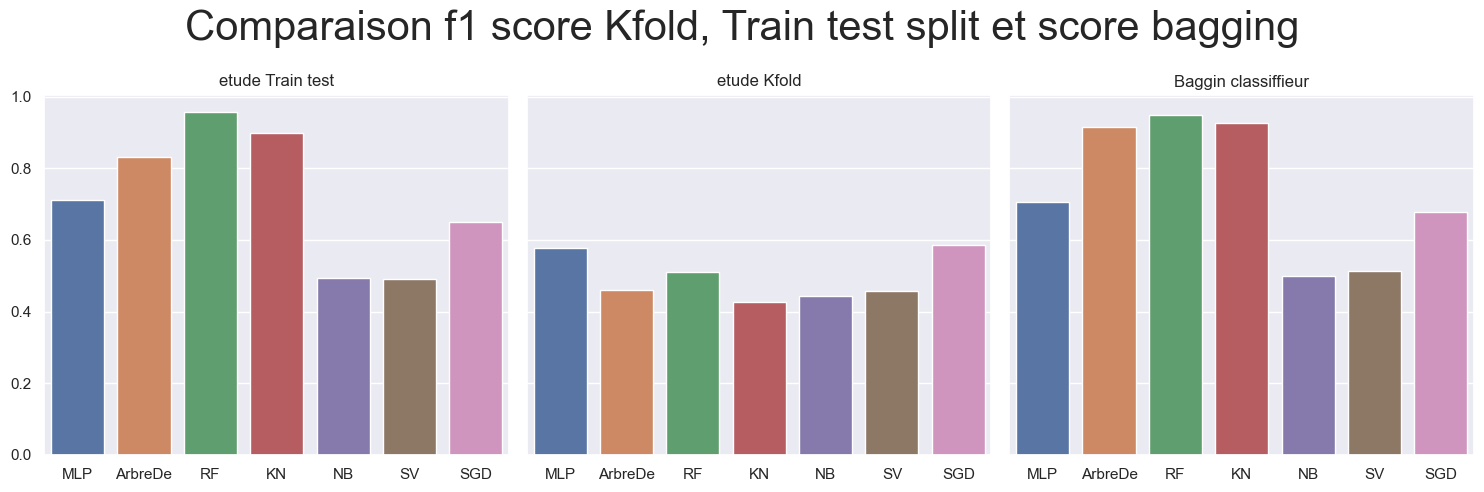

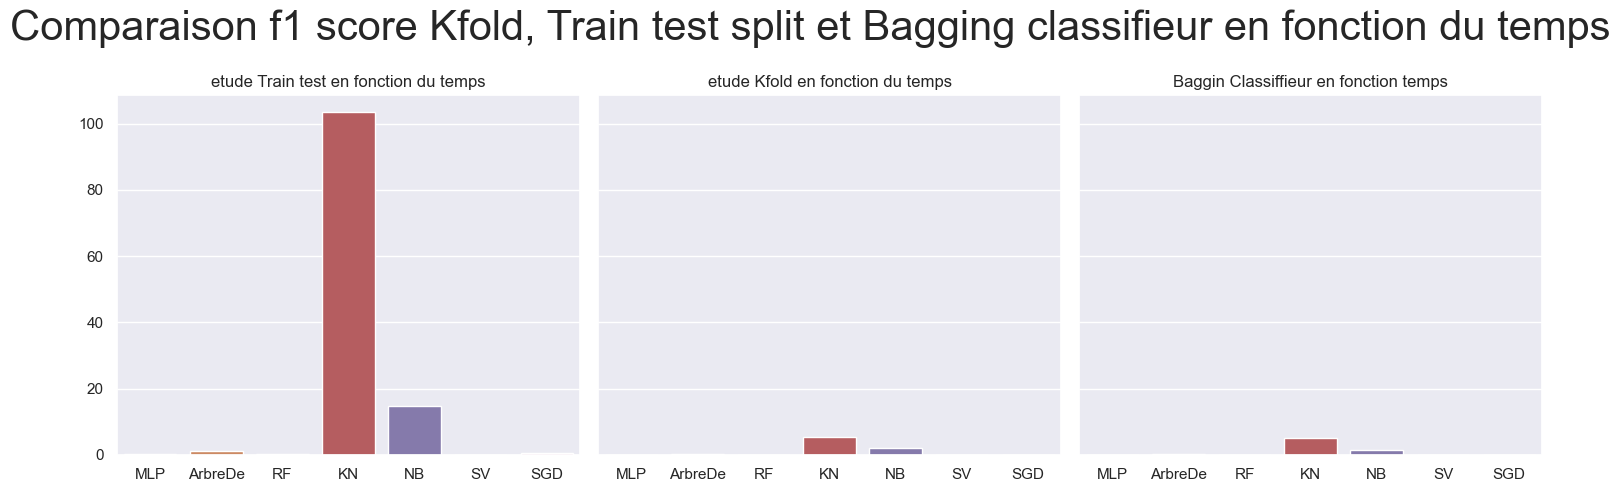

In [77]:
listes_data = [data_f1_score, data_cros_val, data_baggin ]
titles = ["etude Train test","etude Kfold", "Baggin classiffieur" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et score bagging")
listes_data = [data_f1_score_temps, data_cros_val_temps, data_baggin_temps  ]
titles = ["etude Train test en fonction du temps","etude Kfold en fonction du temps", 
          "Baggin Classiffieur en fonction temps" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et Bagging classifieur en fonction du temps")

#### Analyse du Résultat 
Nous voyons que l'alignement des visages ne change pas grand chose sur le resultat global précedent, par contre les modèles devienent plus performant sur les données de petites tailles et aussi le score du modèle MLPClassifier a pratiquement doublé, cela est elle dû a la diminution des points?.</br>

Etudions cela en normalisant les données

In [78]:
#on recupère les données
x, y= take_data()
# normalisation des données
x_scaled = scaled.fit_transform(x)
x_scaled =pd.DataFrame(data = x_scaled, columns = makecolumns(1, 68))
x_scaled.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
0,0.427977,-0.288048,0.342069,0.141898,0.369219,0.573347,0.496216,0.974630,0.678492,1.280244,...,2.223674,1.196993,2.211198,1.155627,2.193277,0.874570,2.082653,0.882618,1.956485,0.876367
1,0.394546,-0.330951,0.291548,0.141898,0.301337,0.617394,0.411212,1.062056,0.592996,1.387125,...,2.241749,1.176732,2.211198,1.135576,2.229533,0.874570,2.082653,0.882618,1.956485,0.895052
2,0.444692,-0.288048,0.358910,0.120019,0.369219,0.573347,0.479215,0.974630,0.644294,1.301620,...,2.241749,1.156471,2.211198,1.135576,2.229533,0.837220,2.100712,0.864077,1.974339,0.857681
3,0.411261,-0.309500,0.358910,0.120019,0.403160,0.573347,0.530218,0.974630,0.712691,1.301620,...,2.223674,1.115949,2.193489,1.075423,2.211405,0.818545,2.082653,0.845536,1.956485,0.820311
4,0.444692,-0.438209,0.375750,-0.055017,0.369219,0.331086,0.496216,0.756064,0.644294,1.109234,...,2.241749,1.055165,2.228908,1.035321,2.229533,0.781195,2.082653,0.789912,1.938632,0.782940


In [79]:
best, data_f1_score = compare_models_f1_score(models, x_scaled , y)

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier:0.8593752771748521
DecisionTreeClassifier:0.8857701995651205
RandomForestClassifier:0.9912761319215975
KNeighborsClassifier:0.9433733363585824
GaussianNB:0.24544772107111848
SVC:0.6580084279827305
SGDClassifier:0.6999507316543552
the best is RandomForestClassifier:0.9912761319215975


In [80]:
best, data_f1_score_temps =compare_models_f1_score_et_temps(models,  x_scaled, y)

MLPClassifier:0.8421476426628173,0.03963323185802099,21.248523100000057
DecisionTreeClassifier:0.909420421290425,1.2225374453042563,0.7438793999999689
RandomForestClassifier:0.9889897347287884,0.1851697894896833,5.340988599999946
KNeighborsClassifier:0.9463838642997351,81.78222124873433,0.011572000000114713
GaussianNB:0.2386299825826547,8.238164997483626,0.02896639999994477
SVC:0.6655312356420057,0.1450757699525813,4.587473400000135
SGDClassifier:0.6769560309826803,0.657090860100089,1.030232000000069
the best is KNeighborsClassifier:81.78222124873433


In [81]:
best, data_cros_val = compare_models_validation_croise(models, x_scaled , y, cv=5)

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPClassifier:0.5367078756750908
DecisionTreeClassifier:0.34254279922362646
RandomForestClassifier:0.3459020024092134
KNeighborsClassifier:0.2999014172512683
GaussianNB:0.21063352177054256
SVC:0.4294013908127807
SGDClassifier:0.6279829958501507
the best is SGDClassifier:0.6279829958501507


In [82]:
best, data_cros_val_temps = compare_models_validation_croise_et_temps(models, x_scaled , y, cv=5)

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier:0.004317356227891956
DecisionTreeClassifier:0.07782668591337313
RandomForestClassifier:0.013680016101263489
KNeighborsClassifier:3.3011775566254444
GaussianNB:1.2582114006530636
SVC:0.016799225814558925
SGDClassifier:0.0991152933941947
the best is KNeighborsClassifier:3.3011775566254444


In [83]:
best, data_baggin = compare_methode_ensemble(models, BaggingClassifier(), x_scaled , y)

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPClassifier:0.8533559207719278
DecisionTreeClassifier:0.9562112363903924
RandomForestClassifier:0.9760987611910125
KNeighborsClassifier:0.9490889629676849
GaussianNB:0.20228428002466076
SVC:0.6253401623818271
SGDClassifier:0.7072743222062821
the best is RandomForestClassifier:0.9760987611910125


In [84]:
best, data_baggin_temps = compare_methode_ensemble_et_temps(models,BaggingClassifier(), x_scaled , y )

C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sambe\anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPClassifier:metric :0.004032577874701157,temps :211.16900350000014,score :0.8515554513367918
DecisionTreeClassifier:metric :0.1878644866568719,temps :5.17372370000021,score :0.9719589470050313
RandomForestClassifier:metric :0.029666129477080423,temps :33.12294010000005,score :0.9826294296681807
KNeighborsClassifier:metric :4.179996074990526,temps :0.2248741000003065,score :0.9399728553683082
GaussianNB:metric :0.6762262670670904,temps :0.3349481999998716,score :0.22650077094675436
SVC:metric :0.03919556517687256,temps :16.54756419999967,score :0.6485911311195701
SGDClassifier:metric :0.10896975803083436,temps :6.687519099999918,score :0.7287373381535742
the best is KNeighborsClassifier:4.179996074990526


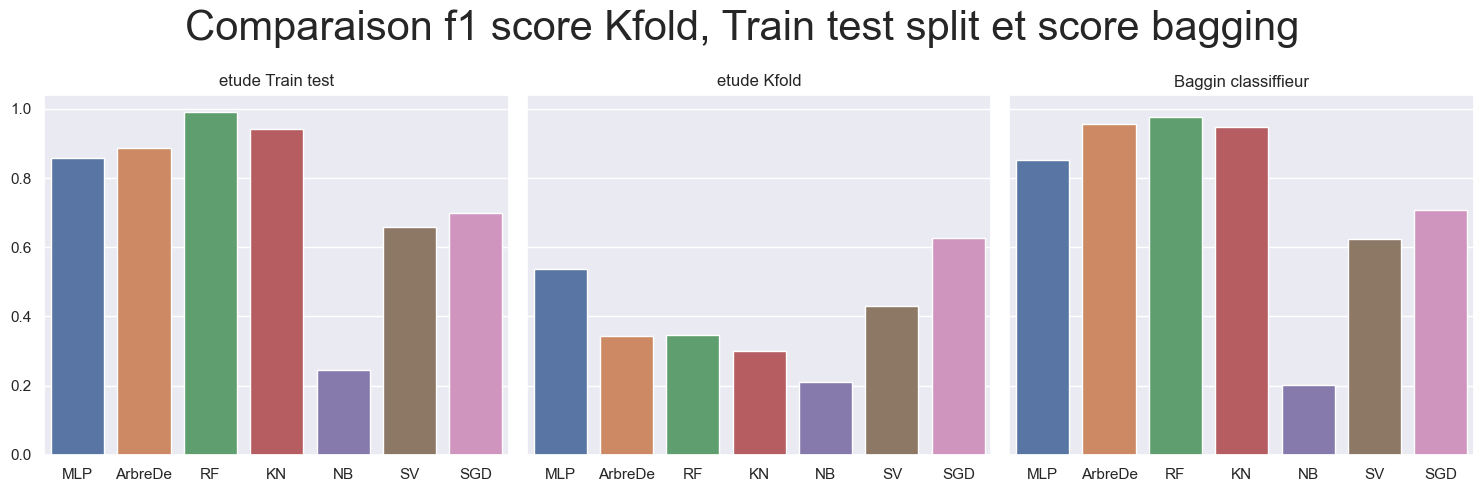

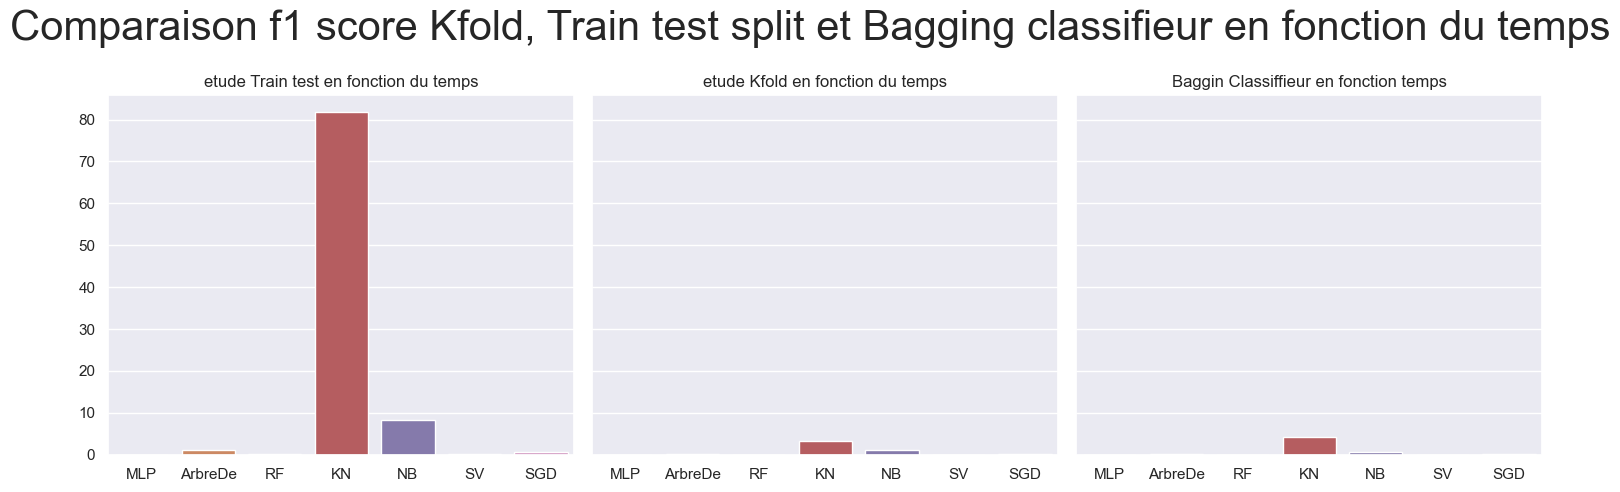

In [85]:
listes_data = [data_f1_score, data_cros_val, data_baggin ]
titles = ["etude Train test","etude Kfold", "Baggin classiffieur" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et score bagging")
listes_data = [data_f1_score_temps, data_cros_val_temps, data_baggin_temps  ]
titles = ["etude Train test en fonction du temps","etude Kfold en fonction du temps", 
          "Baggin Classiffieur en fonction temps" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et Bagging classifieur en fonction du temps")

#### Analyse du Résultat 
Mes doutes se confirmeent, le modèle MLPClassifier s'en sorte mieux avec les données de petites valeur, en plus il pourais être le meilleur quand t'on l'optimise, car dans cette étude le modèle n'as pas finis de converger.</br>
Nous allons le revoir dans la partie optimisaton

### Deuxièmes approches
#### Gestion du déséquilibre

In [86]:
#on recupère les données
x, y= take_data()
x["emotion"] = y
# equilibre
data = reduce_data(x)
x = data.drop(columns = ["emotion"])
y = data[["emotion"]]
x.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x64,y64,x65,y65,x66,y66,x67,y67,x68,y68
93,524,468,524,528,528,587,537,645,556,701,...,778,695,832,695,776,696,750,700,728,696
94,522,467,523,528,528,586,538,644,555,700,...,777,695,834,695,776,698,750,701,728,697
95,524,468,524,530,528,588,537,645,556,700,...,777,695,836,695,776,697,750,700,727,697
96,524,467,524,527,527,585,535,642,552,697,...,779,694,836,694,778,699,750,703,725,699
97,521,468,521,528,525,586,535,643,552,699,...,781,688,841,692,782,707,752,710,725,706


In [87]:
x.shape, y.shape

((3612, 136), (3612, 1))

In [88]:
best, data_f1_score = compare_models_f1_score(models, x, y)

MLPClassifier:0.06445341786273368
DecisionTreeClassifier:0.911726361557241
RandomForestClassifier:0.9882766803794523
KNeighborsClassifier:0.9534167487994287
GaussianNB:0.3519761788155492
SVC:0.46958738129809213
SGDClassifier:0.29076901869225485
the best is RandomForestClassifier:0.9882766803794523


In [89]:
best, data_f1_score_temps =compare_models_f1_score_et_temps(models,  x, y)

MLPClassifier:0.11899876626348661,0.1306582799981554,0.9107633000003261
DecisionTreeClassifier:0.8934026692601337,2.441044922742166,0.3659919000001537
RandomForestClassifier:0.9848774991430349,0.40101373373859533,2.45596949999981
KNeighborsClassifier:0.9408918940143126,151.5221421656736,0.006209600000147475
GaussianNB:0.3087905336063877,20.48660724013025,0.015072799999870767
SVC:0.44966532055585245,0.3146514618572838,1.4290901999997914
SGDClassifier:0.4423230495903245,0.6926418888086939,0.6386027999997168
the best is KNeighborsClassifier:151.5221421656736


In [90]:
best, data_cros_val = compare_models_validation_croise(models, x , y, cv=5)

MLPClassifier:0.024331771462361245
DecisionTreeClassifier:0.08201958732155214
RandomForestClassifier:0.07011194804111891
KNeighborsClassifier:0.05266717959301339
GaussianNB:0.12378046822506272
SVC:0.04683972767106137
SGDClassifier:0.12477819459878774
the best is SGDClassifier:0.12477819459878774


In [91]:
best, data_cros_val_temps = compare_models_validation_croise_et_temps(models, x , y, cv=5)

MLPClassifier:0.004104293826080312
DecisionTreeClassifier:0.03560818927636395
RandomForestClassifier:0.004962826333717575
KNeighborsClassifier:0.9774322904425335
GaussianNB:1.16148468508427
SVC:0.004872153001957266
SGDClassifier:0.05912358029754374
the best is GaussianNB:1.16148468508427


In [92]:
best, data_baggin = compare_methode_ensemble(models, BaggingClassifier(), x , y)

MLPClassifier:0.14366604451641357
DecisionTreeClassifier:0.9690850057807374
RandomForestClassifier:0.9891017826489036
KNeighborsClassifier:0.9488322105609933
GaussianNB:0.2865955716128772
SVC:0.4441811133085896
SGDClassifier:0.3621261309657325
the best is RandomForestClassifier:0.9891017826489036


In [93]:
best, data_baggin_temps = compare_methode_ensemble_et_temps(models,BaggingClassifier(), x , y )

MLPClassifier:metric :0.013417455748924877,temps :15.437675300000137,score :0.20713432520402242
DecisionTreeClassifier:metric :0.3648496914984409,temps :2.674062199999753,score :0.9756307687175519
RandomForestClassifier:metric :0.05336527935224374,temps :18.487418799999887,score :0.9865862687639168
KNeighborsClassifier:metric :10.102581792698183,temps :0.0937485999997989,score :0.9471028994489132
GaussianNB:metric :1.8689077548428623,temps :0.15874840000014956,score :0.29668611582917614
SVC:metric :0.07226617287111975,temps :6.3792263999998795,score :0.4610022778064022
SGDClassifier:metric :0.10557273207712997,temps :4.288819600000352,score :0.45278240255798086
the best is KNeighborsClassifier:10.102581792698183


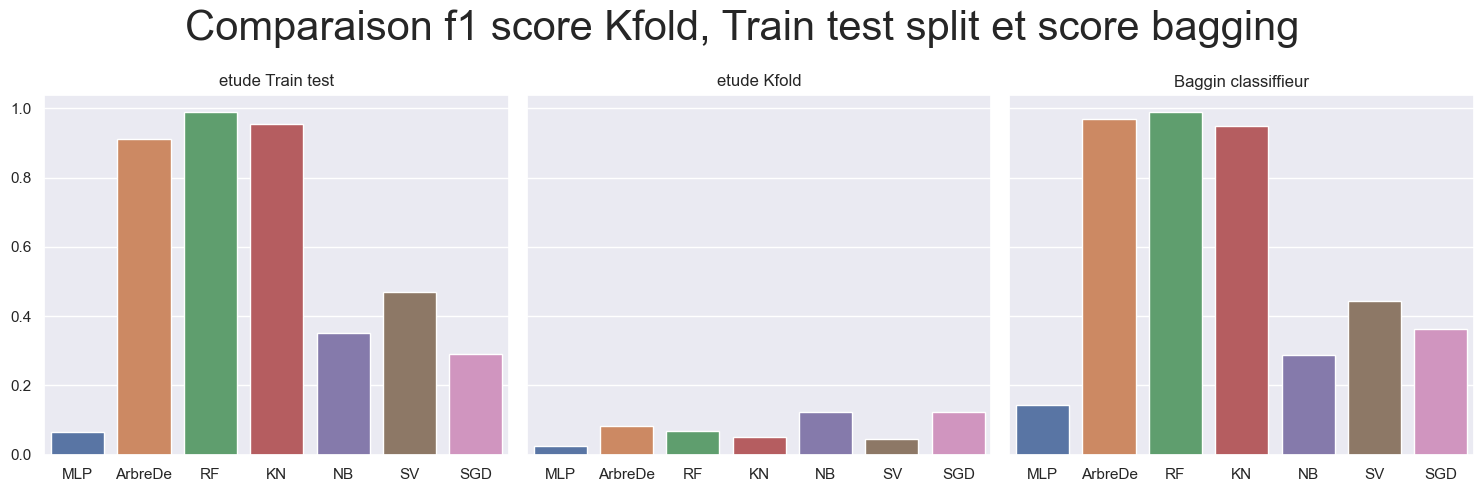

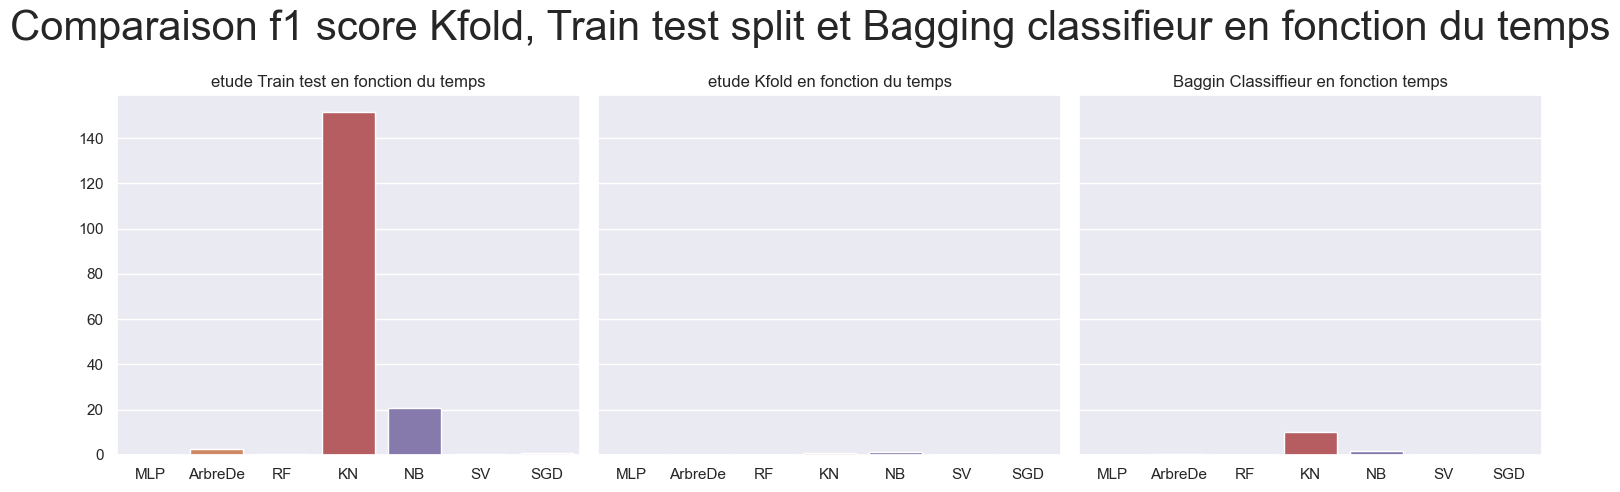

In [94]:
listes_data = [data_f1_score, data_cros_val, data_baggin ]
titles = ["etude Train test","etude Kfold", "Baggin classiffieur" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et score bagging")
listes_data = [data_f1_score_temps, data_cros_val_temps, data_baggin_temps  ]
titles = ["etude Train test en fonction du temps","etude Kfold en fonction du temps", 
          "Baggin Classiffieur en fonction temps" ]
plotting(listes_data, titles, "Comparaison f1 score Kfold, Train test split et Bagging classifieur en fonction du temps")

#### Analyse du Résultat 
Cette technique n'a apparement pas d'effet sur la performance des modèles

### Troisèmes approches :
#### Les Bruitages et Occultations

Durant cette étude nous allons tester plusieurs niveaux de bruitages dans différents endroits du visage et examiner si il ya un quelconque effet sur les performances et surtout quel modèles s'en sort le mieux 

##### Bruitages du l'oeil gauche et occultation de l'oval du visage

In [95]:
x, y= take_data()

In [96]:
scorem = 0
result= dict()
#initialisation du dictionnaire
initialise(result, models)
#re = np.array([])
#decoupage des données en donées d'entrainement et de tests
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
for model in models:
    #entrainer chaque modèle
    model.fit(X_train, np.ravel(y_train))
    # bruittage oeil gauche
    bruitage(X_test, 37, 42)
    #occultation de l'oval du visage
    occultation(X_test,  1,20)
    #faire une predictio générale
    ypred = model.predict(X_test)
    #calcule du f1 score
    score = f1_score(np.ravel(y_test),ypred, average='weighted')
    #ajout du resultat dans mon dictionaire 
    result[model.__class__.__name__].append(score)
    #re.append(score)
    if scorem<score:
        scorem = score
        #recuper le meilleur model
        best = model
    print("{}:{}".format(model.__class__.__name__,score))
print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
#recuperer un dataframe de l'ensemble de mes scores pour les visualiser
data_score = pd.DataFrame(data = result)
data_score.columns = modelnames

MLPClassifier:0.023102250243768517
DecisionTreeClassifier:0.46492258970101896
RandomForestClassifier:0.7549743563122487
KNeighborsClassifier:0.08598350734739306
GaussianNB:0.014714435470670386
SVC:0.0676234678041049
SGDClassifier:0.04884379032775805
the best is RandomForestClassifier:0.7549743563122487


[Text(0.5, 1.0, 'score bruittage oeil et occultation oval du visage')]

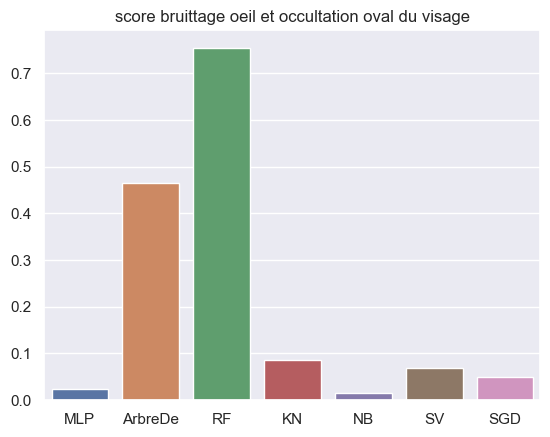

In [97]:
 sns.barplot(data = data_score , orient='v' ).set(title = "score bruittage oeil et occultation oval du visage")

##### Bruittage oeil et occultation de l'oval du visage avec un ensemble

In [98]:
x, y= take_data()

In [99]:
scorem = 0
result= dict()
#initialisation du dictionnaire
initialise(result, models)
#decoupage des données en donées d'entrainement et de tests
ensemble = BaggingClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
for model in models:
    #entrainer chaque modèle
    ensemble = ensemble.set_params(base_estimator=model)
    ensemble.fit(X_train, np.ravel(y_train))
    # bruittage oeil gauche
    bruitage(X_test, 37, 42)
    #occultation de l'oval du visage
    occultation(X_test,  1,20)
    ypred = ensemble.predict(X_test)
    #calcule du f1 score
    score = f1_score( np.ravel(y_test),ypred, average='weighted')
    #ajout du resultat dans mon dictionaire 
    result[model.__class__.__name__].append(score)
    if scorem<score:
        scorem = score
        #recuper le meilleur model
        best = model
    print("{}:{}".format(model.__class__.__name__,score))
print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
#recuperer un dataframe de l'ensemble de mes scores pour les visualiser
data_score = pd.DataFrame(data = result)
data_score.columns = modelnames

MLPClassifier:0.1499823747639812
DecisionTreeClassifier:0.49106698161806656
RandomForestClassifier:0.7783133746128105
KNeighborsClassifier:0.08771540664804714
GaussianNB:0.013717440290866864
SVC:0.06932563425822359
SGDClassifier:0.09534868400857972
the best is RandomForestClassifier:0.7783133746128105


[Text(0.5, 1.0, "score bruittage oeil et occultation de l'oval du visage avec un ensemble")]

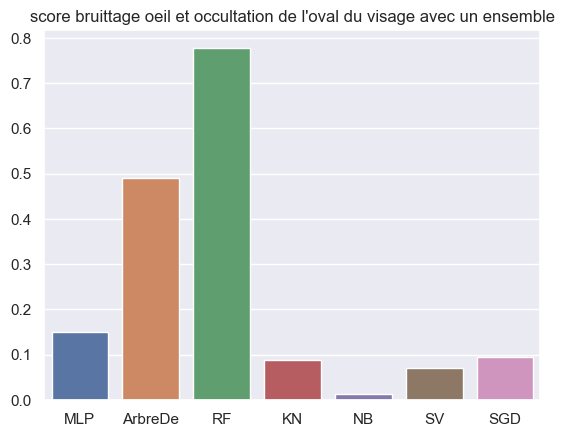

In [100]:
 sns.barplot(data = data_score ,
             orient='v' ).set(title = "score bruittage oeil et occultation de l'oval du visage avec un ensemble")

##### Bruittage oeil et occultation de la bouche

In [101]:
#on recupère les données
x, y= take_data()

In [102]:
scorem = 0
result= dict()
#initialisation du dictionnaire
initialise(result, models)
#re = np.array([])
#decoupage des données en donées d'entrainement et de tests
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
for model in models:
    #entrainer chaque modèle
    model.fit(X_train, np.ravel(y_train))
    # bruittage oeil gauche
    bruitage(X_test, 37, 42)
    #occultation de la bouche
    occultation(X_test,  49,68)
    #faire une predictio générale
    ypred = model.predict(X_test)
    #calcule du f1 score
    score = f1_score( np.ravel(y_test),ypred, average='weighted')
    #ajout du resultat dans mon dictionaire 
    result[model.__class__.__name__].append(score)
    #re.append(score)
    if scorem<score:
        scorem = score
        #recuper le meilleur model
        best = model
    print("{}:{}".format(model.__class__.__name__,score))
print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
#recuperer un dataframe de l'ensemble de mes scores pour les visualiser
data_score = pd.DataFrame(data = result)
data_score.columns = modelnames

MLPClassifier:0.13421253150460113
DecisionTreeClassifier:0.13915578300563802
RandomForestClassifier:0.1987933010971833
KNeighborsClassifier:0.13409858309529257
GaussianNB:0.01529850847172146
SVC:0.07336473641158717
SGDClassifier:0.10740838418515838
the best is RandomForestClassifier:0.1987933010971833


[Text(0.5, 1.0, 'score bruittage oeil gauche et occultation de la bouche')]

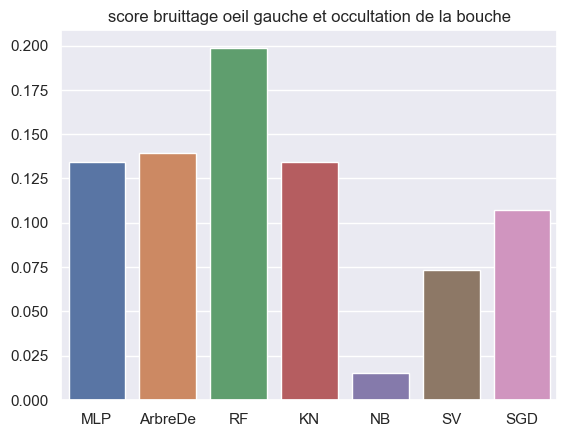

In [103]:
 sns.barplot(data = data_score , orient='v' ).set(title = "score bruittage oeil gauche et occultation de la bouche")

##### Bruittage de la bouche et quelques occultation

In [104]:
#on recupère les données
x, y= take_data()

In [105]:
scorem = 0
result= dict()
#initialisation du dictionnaire
initialise(result, models)
#re = np.array([])
#decoupage des données en donées d'entrainement et de tests
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
for model in models:
    #entrainer chaque modèle
    model.fit(X_train, np.ravel(y_train))
    # bruittage de la bouche
    bruitage(X_test, 49,68)
    # quelques occultation
    occultation(X_test,  37, 42)
    occultation(X_test,  27, 36)
    #faire une predictio générale
    ypred = model.predict(X_test)
    #calcule du f1 score
    score = f1_score( np.ravel(y_test),ypred, average='weighted')
    #ajout du resultat dans mon dictionaire 
    result[model.__class__.__name__].append(score)
    #re.append(score)
    if scorem<score:
        scorem = score
        #recuper le meilleur model
        best = model
    print("{}:{}".format(model.__class__.__name__,score))
print("{}:{}".format("the best is "+ best.__class__.__name__,scorem))
#recuperer un dataframe de l'ensemble de mes scores pour les visualiser
data_score = pd.DataFrame(data = result)
data_score.columns = modelnames

MLPClassifier:0.06565973211741237
DecisionTreeClassifier:0.3014233173644457
RandomForestClassifier:0.27305215127438287
KNeighborsClassifier:0.06565973211741237
GaussianNB:0.05805358800677394
SVC:0.06565973211741237
SGDClassifier:0.06958161036781096
the best is DecisionTreeClassifier:0.3014233173644457


[Text(0.5, 1.0, 'score bruittage bouche')]

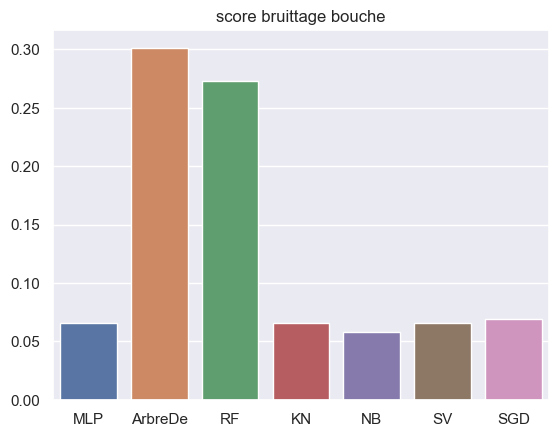

In [106]:
 sns.barplot(data = data_score , orient='v' ).set(title = "score bruittage bouche")

#### Analyse du Résultat:
On a testé quelques bruitages et occultations du visage et on a un resultat plus tôt interressant</br>

Nous avons remarqué que, certaines parties du visages sont plus importante que d'autres.</br>

Notament la partie ovale du visage n'est pas du tout important dans l'amelioration des nos modèles</br>

Par contre la bouche et les yeux sont très important

Le modèle knn qui s'en sortait bien avec les données complètent, devient très mauvais quand t'on change un peu les données, mais très rapide . On peut donc pas se fier seulement à sa rapiditer</br>

Le randomForest reste le meilleur et s'en sort le plus souvent

## Optimisation

L'etude précedente nous a prouver, quand terme de precisions le RFC reste dans tous les très bon.</br>

En prenant en compte la rapidité, la performance sur les petites tailles de données, le modèl RFC reste le meilleur choix

Vus qu'il a deja un score 99% sur les données normale, on vas faire l'optisation les données bruittées, occultées pour voir reéllement si il arrive à etre très performant sur ces données.</br>

Les paramètres d'optimisation dans notre cas vont être:  le critère et la taille maximale de chaque arbre.</br>
Nous allons donc tester le modèle sur les données sur lesquelles il a le plus pétit score


In [107]:
from sklearn.model_selection import GridSearchCV
paramopt = {"criterion":np.array(["gini", "entropy"]), 
            "max_depth":[10,15,20,30,40,50,80,90,100]}
opt = GridSearchCV(RandomForestClassifier(), paramopt)

In [108]:
x, y= take_data()
model = opt
#decoupage des données en donées d'entrainement et de tests
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
#entraine le modèle
model.fit(X_train, np.ravel(y_train))
# bruittage de la bouche
bruitage(X_test, 49,68)
# quelques occultation
occultation(X_test,  37, 42)
occultation(X_test,  27, 36)
#faire une predictio générale
y_pred = model.predict(X_test)
score =f1_score(np.ravel(y_test), y_pred, average='weighted')
print("{}:{}".format(model.__class__.__name__,score))
best_param = model.best_params_
print(model.best_params_)

GridSearchCV:0.469514883207779
{'criterion': 'gini', 'max_depth': 40}


### Résultat 
Nous voyons une nette amélioration du score qui à plus que doublé


#### courbe d’apprentissage 

In [115]:
from sklearn.model_selection import learning_curve
rfc = RandomForestClassifier(**best_param)
x, y = take_data()
train_sizes, train_scores, test_scores = learning_curve(estimator=rfc, X=x, y=np.ravel(y), scoring='f1_weighted', cv =10)

# Calculez la moyenne et l'écart-type des scores d'entraînement et de test
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# display.plot()
# plt.show()



[Text(0.5, 1.0, "Courbe D'apprentissage")]

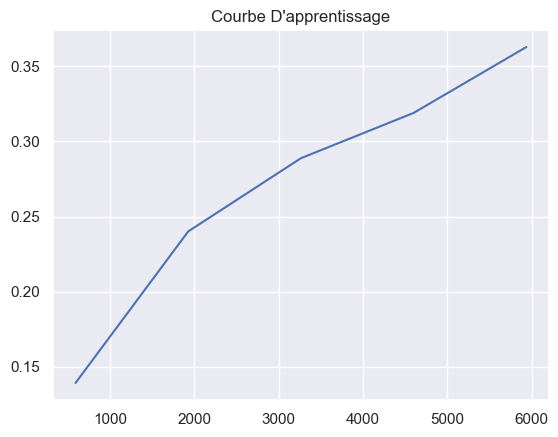

In [116]:
sns.lineplot(x = train_sizes , y = test_mean).set(title = "Courbe D'apprentissage")

Le score evolue en fonction de la taille de données